#Predictive Modeling

In [226]:
import re
import string
import nltk
import numpy as np
import pandas as pd
from airbnb.airbnbneighborhood import AirBnBNeighborhood
from airbnb.airbnblisting import AirBnBListing

pd.options.display.mpl_style = 'default'    # This makes things pretty!
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [257]:
air_hood = AirBnBNeighborhood(db_name='airbnb', coll_name='neighborhoods')
air_listing = AirBnBListing(db_name='airbnb', coll_name='listings')

In [11]:
hood_df = pd.DataFrame(list(air_hood.coll.find({})))
hood_df.head()

,_id,city,city_id,content,data_bbox,data_x,data_y,description,dt,having_a_car,...,neighborhood,neighboring_hoods,pickle,public_trans,requests_meta,similar_hoods,tags,time,traits,url
0,0,san-francisco,1,"\n\n\n<!DOCTYPE html>\n<html lang=""en"" xmlns:...","[[37.77316124717365,-122.43867913456722],[37.7...",-122.433850,37.776497,"Centered on its namesake park, Alamo Square pr...",2015-06-15 18:50:29.851000,Possible,...,Alamo Square,"[Western Addition/NOPA, Lower Haight, Hayes Va...",ccopy_reg\n_reconstructor\np1\n(crequests.mode...,Possible,"{u'is_redirect': False, u'status_code': 200, u...","[potrero-hill, bernal-heights, noe-valley]","[painted ladies, picturesque, views, colorful ...",1.434394e+09,"[Loved by San Franciscans, Stunning Views, Tou...",https://www.airbnb.com/locations/san-francisco...
1,1,san-francisco,1,"\n\n\n<!DOCTYPE html>\n<html lang=""en"" xmlns:...","[[37.707125302005934,-122.40811768178543],[37....",-122.385751,37.730901,Bayview's determined community continues to sp...,2015-06-15 18:50:32.790000,Easy,...,Bayview,"[Dogpatch, Portola, Potrero Hill, Visitacion V...",ccopy_reg\n_reconstructor\np1\n(crequests.mode...,Possible,"{u'is_redirect': False, u'status_code': 200, u...","[visitacion-valley, excelsior, tenderloin]","[shipyard, revitalizing, waterfront, sunny, sk...",1.434394e+09,"[Artsy, Peace & Quiet]",https://www.airbnb.com/locations/san-francisco...
2,2,san-francisco,1,"\n\n\n<!DOCTYPE html>\n<html lang=""en"" xmlns:...","[[37.73161432156119,-122.4336890756706],[37.74...",-122.416407,37.739872,"Outdoor enthusiasts, indoor bookworms, and pet...",2015-06-15 18:50:36.265000,Easy,...,Bernal Heights,"[Glen Park, Mission Terrace, Portola, Potrero ...",ccopy_reg\n_reconstructor\np1\n(crequests.mode...,Possible,"{u'is_redirect': False, u'status_code': 200, u...","[potrero-hill, noe-valley, dogpatch]","[charming, cortland, far from downtown, lesbia...",1.434394e+09,"[Stunning Views, Peace & Quiet, Loved by San F...",https://www.airbnb.com/locations/san-francisco...
3,3,san-francisco,1,"\n\n\n<!DOCTYPE html>\n<html lang=""en"" xmlns:...","[[37.790328234954075,-122.41057147360783],[37....",-122.407279,37.794901,As North America's oldest and largest Chinatow...,2015-06-15 18:50:39.552000,Difficult,...,Chinatown,"[North Beach, Downtown, Financial District, Te...",ccopy_reg\n_reconstructor\np1\n(crequests.mode...,Easy,"{u'is_redirect': False, u'status_code': 200, u...","[mission-district, downtown, financial-district]","[tourists, colors, historic, cuisine, alleys, ...",1.434394e+09,"[Touristy, Shopping, Dining]",https://www.airbnb.com/locations/san-francisco...
4,4,san-francisco,1,"\n\n\n<!DOCTYPE html>\n<html lang=""en"" xmlns:...","[[37.77418243823566,-122.42221226073246],[37.7...",-122.418076,37.779467,Home to San Francisco's City Hall and surround...,2015-06-15 18:50:42.693000,Difficult,...,Civic Center,"[Tenderloin, Hayes Valley, Western Addition/NO...",ccopy_reg\n_reconstructor\np1\n(crequests.mode...,Easy,"{u'is_redirect': False, u'status_code': 200, u...","[glen-park, noe-valley, south-beach]","[symphony, ballet, museum, opera, rallies, pol...",1.434394e+09,[Great Transit],https://www.airbnb.com/locations/san-francisco...


In [19]:
listing_df = pd.DataFrame(list(air_listing.coll.find({})))
listing_df.head()

,_id,address,content,description_clean,description_raw,dt,headline,listing_name,neighborhood,num_saved,pickle,price,price_currency,requests_meta,time,url
0,0,NaN,<!DOCTYPE html>\n\n<!--[if lt IE 8]>\n\n<html ...,NaN,NaN,2015-06-16 01:07:18.082000,Rent unique accommodations from local hosts in...,NaN,N/A,NaN,ccopy_reg\n_reconstructor\np0\n(crequests.mode...,NaN,NaN,"{u'is_redirect': False, u'status_code': 200, u...",1.434417e+09,https://www.airbnb.com/rooms/0
1,6751767,La Torre de Claramunt,<!DOCTYPE html>\n\n<!--[if lt IE 8]>\n\n<html ...,can gramunt es una masía de origen medieval en...,\n\nCan Gramunt es una masía de origen medieva...,2015-06-16 00:21:43.733000,"House in La Torre de Claramunt, Spain. Can Gra...",Acojedor apartamento con piscina,N/A,Saved 1 time,ccopy_reg\n_reconstructor\np0\n(crequests.mode...,128,USD,"{u'is_redirect': False, u'status_code': 200, u...",1.434414e+09,https://www.airbnb.com/rooms/6751767
2,2066868,"Masonic Avenue, San Francisco (Western Additio...",<!DOCTYPE html>\n\n<!--[if lt IE 8]>\n\n<html ...,NaN,NaN,2015-06-16 00:26:41.821000,"Apartment in San Francisco, United States. Bea...",Peaceful Apartment in the Panhandle,Western Addition/NOPA,Saved 2 times,ccopy_reg\n_reconstructor\np0\n(crequests.mode...,175,USD,"{u'is_redirect': False, u'status_code': 200, u...",1.434414e+09,https://www.airbnb.com/rooms/2066868
3,6,"Ohio St, San Diego (North Park)",<!DOCTYPE html>\n\n<!--[if lt IE 8]>\n\n<html ...,the space we are located in the heart of north...,\nThe Space\nWe are located in the heart of No...,2015-06-16 01:07:28.142000,"House in San Diego, United States. Our Beautif...",North Park Craftsmen House & Patio,North Park,Saved 172 times,ccopy_reg\n_reconstructor\np0\n(crequests.mode...,375,USD,"{u'is_redirect': False, u'status_code': 200, u...",1.434417e+09,https://www.airbnb.com/rooms/6
4,4,NaN,<!DOCTYPE html>\n\n<!--[if lt IE 8]>\n\n<html ...,NaN,NaN,2015-06-16 01:07:25.203000,NaN,NaN,N/A,NaN,ccopy_reg\n_reconstructor\np0\n(crequests.mode...,NaN,NaN,"{u'is_redirect': False, u'status_code': 200, u...",1.434417e+09,https://www.airbnb.com/rooms/4


###Prepping Features

In [20]:
listing_df = listing_df[listing_df['description_raw'].isnull() == False]

In [21]:
merged_df = listing_df.merge(right=hood_df[['neighborhood', 'city', 'traits']], on='neighborhood', suffixes=('','_copy'))
merged_df.head()

,_id,address,content,description_clean,description_raw,dt,headline,listing_name,neighborhood,num_saved,pickle,price,price_currency,requests_meta,time,url,city,traits
0,6751766,"Bush St, San Francisco",<!DOCTYPE html>\n\n<!--[if lt IE 8]>\n\n<html ...,interaction with guests i m gone m f 6am to 7p...,\nInteraction with Guests\nI'm gone M-F 6AM to...,2015-06-16 01:18:44.226000,"Apartment in San Francisco, United States. Pri...",Lower Nob Hill Private Room,Downtown,Saved 72 times,ccopy_reg\n_reconstructor\np0\n(crequests.mode...,115,USD,"{u'is_redirect': False, u'status_code': 200, u...",1.434418e+09,https://www.airbnb.com/rooms/6751766,san-francisco,"[Shopping, Great Transit, Touristy, Nightlife,..."
1,1281167,"Post Street, San Francisco (Union Square)",<!DOCTYPE html>\n\n<!--[if lt IE 8]>\n\n<html ...,the space availability can be very volatile i ...,\nThe Space\nAvailability can be very volatile...,2015-06-16 01:19:01.767000,"Apartment in San Francisco, United States. The...",Cool Timeshare/Hotel (Union Sq.),Downtown,Saved 248 times,ccopy_reg\n_reconstructor\np0\n(crequests.mode...,175,USD,"{u'is_redirect': False, u'status_code': 200, u...",1.434418e+09,https://www.airbnb.com/rooms/1281167,san-francisco,"[Shopping, Great Transit, Touristy, Nightlife,..."
2,2478558,"Post Street, San Francisco (Union Square)",<!DOCTYPE html>\n\n<!--[if lt IE 8]>\n\n<html ...,the space as an owner i will transfer my reser...,"\nThe Space\nAs an Owner, I will transfer my r...",2015-06-16 01:19:02.252000,"Apartment in San Francisco, United States. The...","Donatello hotel room, Union Square",Downtown,Saved 8 times,ccopy_reg\n_reconstructor\np0\n(crequests.mode...,155,USD,"{u'is_redirect': False, u'status_code': 200, u...",1.434418e+09,https://www.airbnb.com/rooms/2478558,san-francisco,"[Shopping, Great Transit, Touristy, Nightlife,..."
3,2227475,"Hyde Street, San Francisco (Downtown)",<!DOCTYPE html>\n\n<!--[if lt IE 8]>\n\n<html ...,the space this building is a a registered hist...,\nThe Space\nThis building is a a registered h...,2015-06-16 01:19:04.166000,"Apartment in San Francisco, United States. Cla...",Classic San Francisco,Downtown,Saved 470 times,ccopy_reg\n_reconstructor\np0\n(crequests.mode...,199,USD,"{u'is_redirect': False, u'status_code': 200, u...",1.434418e+09,https://www.airbnb.com/rooms/2227475,san-francisco,"[Shopping, Great Transit, Touristy, Nightlife,..."
4,546633,"Hyde St, San Francisco (Downtown)",<!DOCTYPE html>\n\n<!--[if lt IE 8]>\n\n<html ...,the space cheerful and bright studio in edward...,\nThe Space\nCheerful and bright studio in Edw...,2015-06-16 01:19:10.021000,"Apartment in San Francisco, United States. Che...",Sunny Cheery Lower Nob Hill Studio,Downtown,Saved 465 times,ccopy_reg\n_reconstructor\np0\n(crequests.mode...,115,USD,"{u'is_redirect': False, u'status_code': 200, u...",1.434418e+09,https://www.airbnb.com/rooms/546633,san-francisco,"[Shopping, Great Transit, Touristy, Nightlife,..."


In [22]:
len(merged_df)

3174

In [23]:
merged_df['is_artsy'] = ['Artsy' in x for x in merged_df['traits']]
merged_df['is_shopping'] = ['Shopping' in x for x in merged_df['traits']]
merged_df['is_dining'] = ['Dining' in x for x in merged_df['traits']]
merged_df['is_nightlife'] = ['Nightlife' in x for x in merged_df['traits']]

print "OUT OF %s:" % len(merged_df)
print "   %s (%.1f percent) of listings are known for being Artsy" % (sum(merged_df['is_artsy']), (sum(merged_df['is_artsy'])*1.0/len(merged_df))*100)
print "   %s (%.1f percent) of listings are good for Shopping" % (sum(merged_df['is_shopping']), (sum(merged_df['is_shopping'])*1.0/len(merged_df))*100)
print "   %s (%.1f percent) of listings are good for Dining" % (sum(merged_df['is_dining']), (sum(merged_df['is_dining'])*1.0/len(merged_df))*100)
print "   %s (%.1f percent) of listings are good for Nightlife" % (sum(merged_df['is_nightlife']), (sum(merged_df['is_nightlife'])*1.0/len(merged_df))*100)

OUT OF 3174:
   1209 (38.1 percent) of listings are known for being Artsy
   1249 (39.4 percent) of listings are good for Shopping
   1922 (60.6 percent) of listings are good for Dining
   1422 (44.8 percent) of listings are good for Nightlife


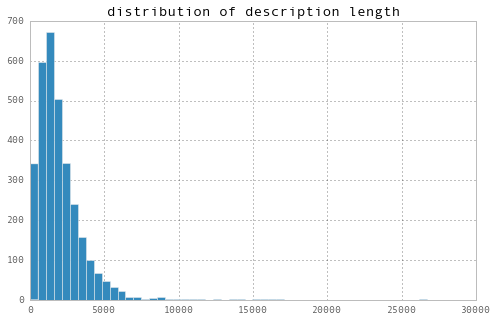

In [33]:
#How many have no description that we can use?
desc_len = [len(x) for x in merged_df['description_raw']]

plt.figure(1, figsize=(8,5))
plt.hist(desc_len, bins=50)
plt.title("distribution of description length")
plt.show()

###Cleaning up the description

In [258]:
# http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions_dict = { 
    "ain't": "am not; are not; is not; has not; have not",
    "aren't": "are not; am not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had / he would",
    "he'd've": "he would have",
    "he'll": "he shall / he will",
    "he'll've": "he shall have / he will have",
    "he's": "he has / he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how has / how is / how does",
    "I'd": "I had / I would",
    "I'd've": "I would have",
    "I'll": "I shall / I will",
    "I'll've": "I shall have / I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had / it would",
    "it'd've": "it would have",
    "it'll": "it shall / it will",
    "it'll've": "it shall have / it will have",
    "it's": "it has / it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had / she would",
    "she'd've": "she would have",
    "she'll": "she shall / she will",
    "she'll've": "she shall have / she will have",
    "she's": "she has / she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as / so is",
    "that'd": "that would / that had",
    "that'd've": "that would have",
    "that's": "that has / that is",
    "there'd": "there had / there would",
    "there'd've": "there would have",
    "there's": "there has / there is",
    "they'd": "they had / they would",
    "they'd've": "they would have",
    "they'll": "they shall / they will",
    "they'll've": "they shall have / they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had / we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what shall / what will",
    "what'll've": "what shall have / what will have",
    "what're": "what are",
    "what's": "what has / what is",
    "what've": "what have",
    "when's": "when has / when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where has / where is",
    "where've": "where have",
    "who'll": "who shall / who will",
    "who'll've": "who shall have / who will have",
    "who's": "who has / who is",
    "who've": "who have",
    "why's": "why has / why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had / you would",
    "you'd've": "you would have",
    "you'll": "you shall / you will",
    "you'll've": "you shall have / you will have",
    "you're": "you are",
    "you've": "you have"
    }

contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)

def clean_description(s):
    # remove section Names/headers of the AirBnB description
    s = s.replace('\nThe Space\n', "", 1)
    s = s.replace('\nGuest Access\n', "", 1)
    s = s.replace('\nInteraction with Guests\n', "", 1)
    s = s.replace('\nThe Neighbourhood\n', "", 1)    # CA specific
    s = s.replace('\nThe Neighborhood\n', "", 1)    # US specific
    s = s.replace('\nGetting Around\n', "", 1)   
    s = s.replace('\nOther Things to Note\n', "", 1)
    
    # convert the string to lowercase
    s = s.lower()
    # remove all non words
    s = re.sub("[^a-zA-Z]"," ", s) 
    # remove puctuation
    # s = re.compile('[%s]' % re.escape(string.punctuation)).sub("", s)

    # remove line breaks
    s = s.replace('\n', " ") 
    # remove multiple spaces   
    s = ' '.join(s.split()) 


    return s

In [259]:
for i, desc_raw in enumerate(merged_df['description_raw'][0:5]):
    print i
    print 
    print desc_raw
    print
    print "**************"
    print

0


Interaction with Guests
I'm gone M-F 6AM to 7PM and potentially for the evening depending on events for the day. Happy to give advice or hang out in the evening.
Getting Around
2 blocks from a cable car pickup. Bus stops are near and the Bart is 0.7 miles. 
Most places are walkable. 
Have never waited more than two minutes for uber or lyft.



**************

1


The Space
Availability can be very volatile. I try to keep the calendar updated as best as I can, ONLY two weeks or less in advance. If you see availability, please submit a reservation request quickly.
Just show up and check in like any other hotel, no arranging to get keys necessary.
DESCRIPTION
Discover this modern hotel, The Donatello, inspired by the renowned Renaissance painter who shares its name. Located in the heart of San Francisco's fashionable shopping and theater district near numerous attractions, the Union Square SF hotel boasts a charming Italian atmosphere, superior amenities and attentive staff.
With 400 

In [358]:
desc_clean = [clean_description(expand_contractions(x)) for x in merged_df['description_raw']]

In [476]:
#I'm finding some issues with tenses & plurals, lets see how Lemmatizers & Stemmers do
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()
from nltk.stem.snowball import SnowballStemmer
sb = SnowballStemmer(language='english')

In [473]:
lemma.lemmatize("jumping")

'jumping'

In [479]:
for i, x in enumerate(desc_clean[:5]):
    print i
    print 
    print x
    print ' '.join([lemma.lemmatize(word) for word in x.split()])
    print ' '.join([sb.stem(word) for word in x.split()])
    print

0

i am gone m f am to pm and potentially for the evening depending on events for the day happy to give advice or hang out in the evening blocks from a cable car pickup bus stops are near and the bart is miles most places are walkable have never waited more than two minutes for uber or lyft
i am gone m f am to pm and potentially for the evening depending on event for the day happy to give advice or hang out in the evening block from a cable car pickup bus stop are near and the bart is mile most place are walkable have never waited more than two minute for uber or lyft
i am gone m f am to pm and potenti for the even depend on event for the day happi to give advic or hang out in the even block from a cabl car pickup bus stop are near and the bart is mile most place are walkabl have never wait more than two minut for uber or lyft

1

availability can be very volatile i try to keep the calendar updated as best as i can only two weeks or less in advance if you see availability please submit

I'm a big fan of the lemmatizer, as it just appears to give beter results. While I didn't robustly test this, I think it's safe to move forward and further explore the situation'

###Naive Bayes

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

In [102]:
#set up data
X_doc = copy(desc_clean)

In [ ]:
#What are the top most used words
tfidf = TfidfVectorizer()
vectorized_corpus = tfidf.fit_transform(X_doc)
X_train = vectorized_corpus.toarray()
sorted(zip(tfidf.get_feature_names(), tfidf.idf_), key=lambda x: x[1])[:20]

In [146]:
#how many words do I have in my corpus?
len(tfidf.get_feature_names())

16655

In [112]:
mnb = MultinomialNB()

In [175]:
def run_mnb(max_df, max_features, min_df, random_state, y):
    
    X_train_doc, X_test_doc, y_train, y_test = train_test_split(X_doc, y, random_state=random_state)
    
    tfidf=TfidfVectorizer(max_df=max_df, max_features=max_features, min_df=min_df)
    vectorized_corpus = tfidf.fit_transform(X_train_doc)
    X_train = vectorized_corpus.toarray()
    
    mnb.fit(X_train, y_train)
    train_score = mnb.score(X_train, y_train)

    X_test = tfidf.transform(X_test_doc).toarray()
    test_score = mnb.score(X_test, y_test)

    return (train_score, test_score)

In [176]:
#Running a nice grid search to see what features matter
def run_mnb_grid_search(y):
    max_df_list = [.5, .66, .75, .83, .90, 1.0]
    max_feature_list = [500, 1000, 2000, 3000, 4000, 5000, 8000]
    min_df_list = [1,2]
    random_state_list = [1, 42, 1337]

    results = []
    for max_df in max_df_list:
        for max_features in max_feature_list:
            for min_df in min_df_list:
                for random_state in random_state_list:
                    train_score, test_score = run_mnb(max_df, max_features, min_df, random_state, y)
                    cur_result = [max_df, max_features, min_df, random_state, train_score, test_score]
                    print cur_result
                    results.append(cur_result)
    return results

In [177]:
y = merged_df['is_artsy']
results = run_mnb_grid_search(y)

[0.5, 500, 1, 1, 0.73865546218487399, 0.72544080604534]
[0.5, 500, 1, 42, 0.73571428571428577, 0.72544080604534]
[0.5, 500, 1, 1337, 0.73655462184873954, 0.66120906801007562]
[0.5, 500, 2, 1, 0.73991596638655466, 0.72670025188916876]
[0.5, 500, 2, 42, 0.73571428571428577, 0.72544080604534]
[0.5, 500, 2, 1337, 0.73655462184873954, 0.66120906801007562]
[0.5, 1000, 1, 1, 0.79621848739495793, 0.76448362720403018]
[0.5, 1000, 1, 42, 0.79915966386554627, 0.75818639798488663]
[0.5, 1000, 1, 1337, 0.79831932773109249, 0.70528967254408059]
[0.5, 1000, 2, 1, 0.79621848739495793, 0.76574307304785894]
[0.5, 1000, 2, 42, 0.79915966386554627, 0.75818639798488663]
[0.5, 1000, 2, 1337, 0.79705882352941182, 0.70654911838790935]
[0.5, 2000, 1, 1, 0.82310924369747895, 0.76448362720403018]
[0.5, 2000, 1, 42, 0.82058823529411762, 0.77959697732997479]
[0.5, 2000, 1, 1337, 0.82563025210084029, 0.71662468513853905]
[0.5, 2000, 2, 1, 0.82436974789915962, 0.76700251889168769]
[0.5, 2000, 2, 42, 0.82184873949579

In [271]:
results_df = pd.DataFrame(results, columns=['max_df', 'max_features', 'min_df', 'random_state', 'train_score', 'test_score'])
results_df.sort(columns='test_score', ascending=False, inplace=True)
results_df

,max_df,max_features,min_df,random_state,train_score,test_score
13,0.50,2000,1,42,0.820588,0.779597
16,0.50,2000,2,42,0.821849,0.779597
58,0.66,2000,2,42,0.813025,0.775819
97,0.75,2000,1,42,0.812605,0.775819
100,0.75,2000,2,42,0.813025,0.775819
22,0.50,3000,2,42,0.821008,0.774559
55,0.66,2000,1,42,0.812605,0.774559
142,0.83,2000,2,42,0.810924,0.773300
19,0.50,3000,1,42,0.822269,0.773300
139,0.83,2000,1,42,0.810924,0.772040


In [179]:
max_test_score = max(results_df['test_score'])
max_test_score

0.77959697732997479

In [180]:
max_test_results_df = results_df[results_df['test_score']==max_test_score]

In [181]:
max_test_results_df

,max_df,max_features,min_df,random_state,train_score,test_score
13,0.5,2000,1,42,0.820588,0.779597
16,0.5,2000,2,42,0.821849,0.779597


In [194]:
def tiebreaker(max_test_results_df):
    tiebreaker_df = max_test_results_df.copy()
    tiebreaker_df['final_score'] = 0
    for i in tiebreaker_df.index:
        max_df = tiebreaker_df['max_df'][i]
        max_features = tiebreaker_df['max_features'][i]
        min_df = tiebreaker_df['min_df'][i]
        random_state = tiebreaker_df['random_state'][i]
        
        tfidf=TfidfVectorizer(max_df=max_df, max_features=max_features, min_df=min_df)
        vectorized_corpus = tfidf.fit_transform(X_doc)
        X = vectorized_corpus.toarray()
        
        mnb.fit(X, y)
        tiebreaker_df['full_score'] = mnb.score(X, y)
    
    tiebreaker_df.sort('full_score', inplace=True)
    tiebreaker_df.reset_index(inplace=True)
    return (tiebreaker_df['max_df'][0], tiebreaker_df['max_features'][0], tiebreaker_df['min_df'][0])
tiebreaker(max_test_results_df)

(0.5, 2000, 1)

In [195]:
#What are my top words of the final model?
tfidf=TfidfVectorizer(max_df=0.5, max_features=2000, min_df=1)
tfidf.fit_transform(X_doc)
sorted(zip(tfidf.get_feature_names(), tfidf.idf_), key=lambda x: x[1])[:20]

[(u'if', 1.6934621908003828),
 (u'bedroom', 1.6978827853057794),
 (u'park', 1.7010523600670586),
 (u'living', 1.7074218083525383),
 (u'also', 1.7196366821794247),
 (u'blocks', 1.7558605965620537),
 (u'city', 1.7578746959337548),
 (u'we', 1.7578746959337548),
 (u'an', 1.7639414486159923),
 (u'very', 1.7659719061663743),
 (u'full', 1.7686856120379706),
 (u'not', 1.7741352168055351),
 (u'located', 1.786506508608082),
 (u'bathroom', 1.7962355638062011),
 (u'by', 1.8456194796302596),
 (u'available', 1.8500312514919228),
 (u'great', 1.8589136192908526),
 (u'out', 1.8852804951315947),
 (u'but', 1.8914060885582775),
 (u'new', 1.9006654139710744)]

###Trees: Random Forrest, Gradient Boosting

In [419]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [411]:
rfc = RandomForestClassifier(n_estimators=200, oob_score=True)
gbc = GradientBoostingClassifier()

In [415]:
rfc.fit(tfidf.fit_transform(X_doc).toarray(), y)
print rfc.oob_score_

gbc.fit(tfidf.fit_transform(X_doc).toarray(), y)
print gbc.score(tfidf.fit_transform(X_doc).toarray(), y)

0.820415879017
0.893194706994


WOW! The fit is pretty good..

But what happens if we do a proper split?

In [425]:
X_train_doc, X_test_doc, y_train, y_test = train_test_split(X_doc, y, random_state=42)
rfc.fit(tfidf.fit_transform(X_train_doc).toarray(), y_train)
print rfc.score(tfidf.transform(X_test_doc).toarray(), y_test)

gbc.fit(tfidf.fit_transform(X_train_doc).toarray(), y_train)
print gbc.score(tfidf.transform(X_test_doc).toarray(), y_test)

0.817380352645
0.809823677582


In [398]:
sorted(zip(tfidf.get_feature_names(), rfc.feature_importances_), key=lambda x: x[1], reverse=True)[:25]

[(u'williamsburg', 0.029109087419604426),
 (u'bedford', 0.013369219194450355),
 (u'park', 0.011830922005827769),
 (u'dolores', 0.010870473250134252),
 (u'bushwick', 0.010524286004604177),
 (u'mission', 0.0097990525382912405),
 (u'castro', 0.0072686096767459697),
 (u'valencia', 0.0072375140450894604),
 (u'bars', 0.0066275112345564723),
 (u'galleries', 0.006367608837526237),
 (u'loft', 0.0060448691204129969),
 (u'brooklyn', 0.0057511462406990496),
 (u'beach', 0.0057354555479226625),
 (u'central', 0.0056659219320041839),
 (u'train', 0.0053384949401328848),
 (u'village', 0.0050545490684460745),
 (u'we', 0.0050362775311282755),
 (u'art', 0.0050140985664765695),
 (u'space', 0.0046801986292638147),
 (u'clinton', 0.0044262550459207043),
 (u'greenpoint', 0.0039285603671103371),
 (u'safe', 0.0035760397093168861),
 (u'bus', 0.0033025423132180785),
 (u'moscone', 0.0032312300530232705),
 (u'bart', 0.003215924606638324)]

In the top 25 words, a lot of top words are neighborhoods (williamsburg, mission, greenpoint, castro), as well as local streets (bedford, valencia, haight)

What happens if we run our best performing model from above and scrub the neighborhoods

In [206]:
docs_with_hoods = copy(desc_clean)
neighborhood_set = set([x.replace(' ','').lower() for x in hood_df['neighborhood']])

In [222]:
rfc.fit(tfidf.fit_transform(docs_without_hoods).toarray(), y)
rfc.oob_score_

0.72085696282293632

In [223]:
sorted(zip(tfidf.get_feature_names(), rfc.feature_importances_), key=lambda x: x[1], reverse=True)[:25]

[(u'park', 0.019799216464381764),
 (u'dolores', 0.016591876960750082),
 (u'brooklyn', 0.010981191702110107),
 (u'train', 0.0097157332304333641),
 (u'bedford', 0.0089377619078026618),
 (u'central', 0.0087695565373142534),
 (u'valencia', 0.008476556155353341),
 (u'galleries', 0.0082301676048031),
 (u'clinton', 0.0063508447189052171),
 (u'mission', 0.0061243932127349361),
 (u'stop', 0.005888395858413868),
 (u'loft', 0.0055455137788217954),
 (u'haight', 0.0054119733327493286),
 (u'bars', 0.0050950909866558551),
 (u'would', 0.0049459263052396476),
 (u'art', 0.0046306307865556715),
 (u'music', 0.0041397194405320302),
 (u'bus', 0.0039708395128391968),
 (u'space', 0.0039008908376328712),
 (u'people', 0.0038706729254413194),
 (u'village', 0.0038308752730410165),
 (u'moscone', 0.0035487960909486608),
 (u'wifi', 0.0035033385307638798),
 (u'gate', 0.0035002931539635457),
 (u'guest', 0.0032369965101556515)]

In [221]:
docs_without_hoods = []
for doc in docs_with_hoods:
    cur_doc = ""
    for word in doc.split():
        if not word in neighborhood_set:
            cur_doc += "%s " % word
    docs_without_hoods.append(cur_doc)

In [224]:
docs_without_hoods

mnb.fit(tfidf.fit_transform(docs_without_hoods).toarray(), y)
mnb.score(tfidf.fit_transform(docs_without_hoods).toarray(), y)

0.80655324511657212

In [255]:
X_train_doc, X_test_doc, y_train, y_test = train_test_split(docs_without_hoods, y, random_state=42)

tfidf=TfidfVectorizer(max_df=.5, max_features=2000, min_df=1)
vectorized_corpus = tfidf.fit_transform(X_train_doc)
X_train = vectorized_corpus.toarray()

mnb.fit(X_train, y_train)
train_score = mnb.score(X_train, y_train)

X_test = tfidf.transform(X_test_doc).toarray()
test_score = mnb.score(X_test, y_test)

print train_score, test_score

0.804621848739 0.773299748111


So based on this, my NB model's accuracy goes down from 
0.8206 | 0.7796 
to
0.8046 | 0.7733

A loss of <0.5% prediction is not nothing, but doesn't appear to warrent cleansing the dataset.

So based on the above, I created a generate_mnb_models.py script to run & get the best possible models to use.

Below I test NMF & Word2Vec/Doc2Vec

\#awesome

#SVM

In [421]:
from sklearn.svm import LinearSVC
svc = LinearSVC()

In [422]:


svc.fit(tfidf.fit_transform(X_train_doc).toarray(), y_train)
svc.score(tfidf.transform(X_test_doc).toarray(), y_test)

0.81989924433249373

In [462]:
X_train_doc, X_test_doc, y_train, y_test = train_test_split(X_doc, y, random_state=1337)
svc.fit(tfidf.fit_transform(X_train_doc).toarray(), y_train)
mnb.fit(tfidf.fit_transform(X_train_doc).toarray(), y_train)
gbc.fit(tfidf.fit_transform(X_train_doc).toarray(), y_train)

vectorized_test = tfidf.transform(X_test_doc).toarray()
gbc_results = gbc.predict(vectorized_test)
mnb_results = mnb.predict(vectorized_test)
svc_results = svc.predict(vectorized_test)

print len(y_test)
print
print sum(gbc_results==y_test)
print sum(mnb_results==y_test)
print sum(svc_results==y_test)
print
print sum([bool(round((int(a)+int(b)+int(c))/3))==y_n for a,b,c,y_n in zip(gbc_results, mnb_results, svc_results, y_test)])

794

619
569
626

560


In [460]:
#biggest postives
sorted(zip(tfidf.get_feature_names(), svc.coef_[0]), key=lambda x: x[1])[:-20:-1]

[(u'williamsburg', 3.8219999167190446),
 (u'castro', 3.3632806136060673),
 (u'bedford', 2.741469213009585),
 (u'valencia', 2.4555359045397398),
 (u'dolores', 2.3516528072091591),
 (u'village', 2.126212435559701),
 (u'moscone', 2.0613090502145512),
 (u'mission', 2.0551671079888156),
 (u'haight', 2.0278809967574185),
 (u'bushwick', 1.9800406288462229),
 (u'clinton', 1.8632416233305953),
 (u'stuy', 1.7379259976097527),
 (u'gets', 1.7290149425756844),
 (u'chelsea', 1.7158281878739545),
 (u'astor', 1.6665693391372478),
 (u'stuyvesant', 1.6342793561463216),
 (u'urban', 1.5052078382296135),
 (u'brooklyn', 1.4807479037771338),
 (u'greenpoint', 1.4771809833168779)]

In [459]:
#biggest negatives
sorted(zip(tfidf.get_feature_names(), svc.coef_[0]), key=lambda x: x[1])[:20]

[(u'beach', -2.0668470421950231),
 (u'heights', -2.060402959222233),
 (u'harlem', -1.9462526559723712),
 (u'park', -1.896805432067586),
 (u'bernal', -1.7639937532649299),
 (u'noe', -1.6876827652947293),
 (u'west', -1.684415610971854),
 (u'glen', -1.5811774768796507),
 (u'washington', -1.5163377250421464),
 (u'bridge', -1.5149945720435336),
 (u'granite', -1.5115929296436081),
 (u'alamo', -1.4918610871190212),
 (u'library', -1.4301067449808458),
 (u'stations', -1.3838526141932914),
 (u'prospect', -1.3716548727397748),
 (u'chinatown', -1.3081748989769582),
 (u'lexington', -1.3015304188011672),
 (u'polk', -1.2859323555866013),
 (u'farmer', -1.2401992779347273),
 (u'remodeled', -1.2178567730823233)]

#Testing NMF

In [273]:
from sklearn.decomposition import NMF as NMF_real

In [276]:
tfidf = TfidfVectorizer(max_df=.5, max_features=2000, min_df=1)
vectorized_corpus = tfidf.fit_transform(X_doc)
X_train = vectorized_corpus.toarray()

In [283]:
nmf_real = NMF_real(n_components=12)
nmf_real.fit(X_train)

NMF(beta=1, eta=0.1, init=None, max_iter=200, n_components=12,
  nls_max_iter=2000, random_state=None, sparseness=None, tol=0.0001)

In [284]:
feature_names = tfidf.get_feature_names()

n_top_words = 20
for topic_idx, topic in enumerate(nmf_real.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print

Topic #0:
my if am not but so me do very out use get like also want place up need here please

Topic #1:
san francisco parking muni gate park golden bart blocks downtown bus mission beach valley car bay public haight city castro

Topic #2:
we our us home if so also re guests do not but here out love people own just welcome about

Topic #3:
bedroom large living full queen size tv flat dining floor two bathroom features fully high equipped cable windows building washer

Topic #4:
brooklyn prospect park museum gardens manhattan slope garden heights brownstone botanical barclays trains clinton hill greene fort new atlantic avenue

Topic #5:
train minutes manhattan williamsburg minute subway blocks close very stop station loft bushwick great only bars also bedford by ride

Topic #6:
community mission fun active enough culture term diverse bike we night house melting restful jump premier dynamic culturally basics space

Topic #7:
th st central building ave park avenue subway square times wes

#Testing Doc2Vec

In [286]:
from gensim.models import Word2Vec

In [360]:
W2V_docs = [x.split() for x in desc_clean]
W2V_docs[:5]
W2V_model = Word2Vec(W2V_docs)

In [303]:
#playing around with Word2Vec
# model.most_similar(positive=['neighborhood'], negative=['local'], topn=10)
# model.most_similar(positive=['neighborhood'])
# model.most_similar(positive=['italian'])
# model.most_similar(positive=['beer'])
model.most_similar(positive=['hipster'], negative=['francisco'])

[(u'bakeries', 0.5597109198570251),
 (u'satisfy', 0.5508257150650024),
 (u'latin', 0.5454130172729492),
 (u'salons', 0.5315362215042114),
 (u'specialty', 0.5271623134613037),
 (u'locally', 0.5249436497688293),
 (u'pubs', 0.5232607126235962),
 (u'chinese', 0.5213254690170288),
 (u'delicious', 0.5206075310707092),
 (u'fruit', 0.5196725130081177)]

In [304]:
from gensim.models.doc2vec import LabeledSentence, Doc2Vec

In [305]:
d2v_df = merged_df.copy()

In [323]:
d2v_df['d2v_labels'] = ""
d2v_df['d2v_labels'] += ["LABEL_NIGHTLIFE " if x==True else "" for x in d2v_df['is_nightlife']]
d2v_df['d2v_labels'] += ["LABEL_ARTSY " if x==True else "" for x in d2v_df['is_artsy']]
d2v_df['d2v_labels'] += ["LABEL_SHOPPING " if x==True else "" for x in d2v_df['is_shopping']]
d2v_df['d2v_labels'] += ["LABEL_DINING " if x==True else "" for x in d2v_df['is_dining']]
d2v_df['d2v_labels'] += ["LISTING_%s " % x for x in d2v_df['_id']]
d2v_df['d2v_labels'] += ["HOOD_%s " % x.upper() for x in d2v_df['neighborhood']]
d2v_df['d2v_labels'] += ["CITY_%s " % x.upper().replace("-","") for x in d2v_df['city']]

# for listing in merged_df.index:
#     model_labels += "LABEL_NIGHTLIFE" if merged_df['is_nightlife']
#     model_labels += ["LISTING_" + merged_df['_id'][listing]]
#     model_labels += ["HOOD_" + listing['neighborhood'].replace(' ','_')]
#     model_labels += ["CITY_" + listing['city']]
#     model_labels = [label.encode('ascii','ignore') for label in model_labels]
#     labeled_listing = LabeledSentence(words = listing['words'], labels = model_labels)
#     labeled_listings.append(labeled_listing)

u'LABEL_NIGHTLIFE LABEL_SHOPPING LABEL_DINING LISTING_6751766 HOOD_DOWNTOWN CITY_SANFRANCISCO '

In [362]:
labeled_listings = []
for doc, labels in zip(W2V_docs, d2v_df['d2v_labels']):
    labeled_listing = LabeledSentence(words = doc, labels = labels.split())
    labeled_listings.append(labeled_listing)

In [363]:
d2v_model = Doc2Vec(labeled_listings)

In [391]:
#playing around with Word2Vec
d2v_model.most_similar(positive=['CITY_NEWYORK'], negative=[], topn=20)
d2v_model.most_similar(positive=['CITY_SANFRANCISCO'], negative=[], topn=20)
d2v_model.most_similar(positive=['HOOD_WILLIAMSBURG', 'CITY_SANFRANCISCO'], negative=['CITY_NEWYORK'], topn=20)
d2v_model.most_similar(positive=['franciscan'], negative=['CITY_SANFRANCISCO'], topn=20)
d2v_model.most_similar(positive=['beautiful'], negative=[], topn=20)

[(u'epic', 0.40934309363365173),
 (u'sunroom', 0.3422703742980957),
 (u'oversized', 0.3244786262512207),
 (u'nice', 0.3241443634033203),
 (u'lovely', 0.3191782236099243),
 (u'mugs', 0.31732261180877686),
 (u'resting', 0.3170066475868225),
 (u'panoramic', 0.31582677364349365),
 (u'prestigious', 0.31463849544525146),
 (u'LISTING_1769483', 0.31370115280151367),
 (u'LISTING_5630741', 0.31231874227523804),
 (u'noble', 0.31004229187965393),
 (u'developing', 0.3075587749481201),
 (u'LISTING_619471', 0.302995890378952),
 (u'LISTING_643490', 0.29789823293685913),
 (u'homey', 0.29422682523727417),
 (u'rapidly', 0.2915553152561188),
 (u'LISTING_6689092', 0.2893918752670288),
 (u'LISTING_6077601', 0.28772491216659546),
 (u'magnificent', 0.2872794270515442)]

In [392]:
x = merged_df[merged_df['_id']=='1769483'].index[0]
' '.join(W2V_docs[x])

u'our home is a stand alone cottage one block from dolores park the house is set off the street with a lovely front courtyard filled with flowers we re on one of the best blocks in the city right between the mission and the castro but its amazingly quiet here a true urban oasis the house has a large master bed bath on the top floor a dining room living room area adjoining the kitchen on the ground floor and then a nd queen bed in the basement we have a full dishwasher and a washer dryer'

In [444]:
print .7*.7*.7
print 3*.7*.7*.3
print 

0.343
0.441


In [447]:
print 1.0*598/794

print 1.0*643/794
print 1.0*619/794
print 1.0*651/794

0.75314861461
0.809823677582
0.77959697733
0.819899244332


Load SVC Models & Grab top 50 words

In [482]:
TFIDF = pickle.load(open('../models/tfidf_svc.pkl'))
MODEL_ARTSY = pickle.load(open('../models/svc_artsy_final.pkl'))
MODEL_DINING = pickle.load(open('../models/svc_dining_final.pkl'))
MODEL_NIGHTLIFE = pickle.load(open('../models/svc_nightlife_final.pkl'))
MODEL_SHOPPING = pickle.load(open('../models/svc_shopping_final.pkl'))

In [507]:
# y = merged_df['is_artsy']
# y = merged_df['is_shopping']
y = merged_df['is_dining']
# y = merged_df['is_nightlife']

rfc.fit(tfidf.fit_transform(X_doc).toarray(), y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [508]:
most_important_words = sorted(zip(tfidf.get_feature_names(), rfc.feature_importances_), key=lambda x: x[1], reverse=True)[:33]
# most_important_words
most_important_words_set = set([x[0] for x in most_important_words])
print most_important_words_set
# pickle.dump(most_important_words_set, open('../models/top_words_artsy.pkl', 'w'))
# pickle.dump(most_important_words_set, open('../models/top_words_shopping.pkl', 'w'))
pickle.dump(most_important_words_set, open('../models/top_words_dining.pkl', 'w'))
# pickle.dump(most_important_words_set, open('../models/top_words_nightlife.pkl', 'w'))

set([u'prospect', u'upper', u'bart', u'heart', u'house', u'mission', u'village', u'close', u'glen', u'union', u'museum', u'williamsburg', u'dolores', u'zoo', u'other', u'haight', u'utica', u'th', u'nopa', u'valencia', u'full', u'loft', u'very', u'express', u'park', u'train', u'stuyvesant', u'central', u'island', u'lexington', u'alamo', u'subway', u'side'])


In [510]:
print rfc.oob_score_

0.764020163831
